<a href="https://colab.research.google.com/github/Vaibhavs10/how-to-whisper/blob/main/01_how_to_asr_big_picture_whisper_edition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build with Audio the easy way!
Tutorial by: *Vaibhav Srivastav* [@reach_vb](https://twitter.com/reach_vb)

Curious to know about me? [https://vaibhav.wiki/about](https://vaibhav.wiki/about) 

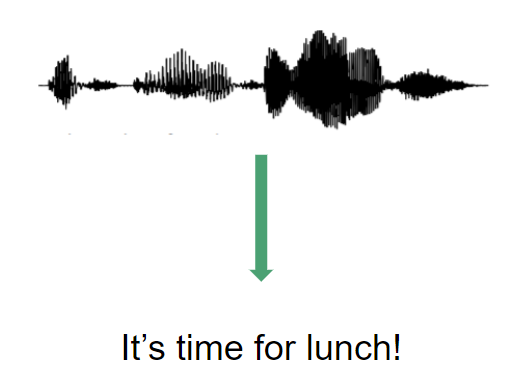


It's a method of converting audio to text, i.e. spoken language (waveform) to meanigful and comprehensible text.

In [2]:
!pip install -q transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 115.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 17.6 MB/s eta 0:00:00


In [3]:
import datasets
from IPython.display import Audio

## Let's look at an example!

We'll use the Fleurs dataset for our initial tests and then work our way to another datasets.

*Fleurs is the speech version of the FLoRes machine translation benchmark. We use 2009 n-way parallel sentences from the FLoRes dev and devtest publicly available sets, in 102 languages.*

https://huggingface.co/datasets/google/fleurs

In [4]:
audio_files = datasets.load_dataset("google/fleurs", split="validation", name="en_us", streaming=True)

Alright, now that the dataset is initialised, let's look at what as sample looks like.

In [5]:
next(iter(audio_files))

{'id': 1548,
 'num_samples': 104640,
 'path': None,
 'audio': {'path': 'dev/10010138729160973689.wav',
  'array': array([ 2.38418579e-07, -2.98023224e-07,  3.57627869e-07, ...,
         -1.15573406e-04, -3.05771828e-04, -3.32832336e-04]),
  'sampling_rate': 16000},
 'transcription': 'when you call someone who is thousands of miles away you are using a satellite',
 'raw_transcription': 'When you call someone who is thousands of miles away, you are using a satellite.',
 'gender': 0,
 'lang_id': 19,
 'language': 'English',
 'lang_group_id': 0}

and what does it sound like?

In [6]:
Audio(next(iter(audio_files))["audio"]["array"], rate=next(iter(audio_files))["audio"]["sampling_rate"])

and the transcription?

In [7]:
next(iter(audio_files))["raw_transcription"]

'When you call someone who is thousands of miles away, you are using a satellite.'

In ASR, our goal is to learn to map these audios to the corresponding transcription for fun and profit :)

## Alright, we have the data lets see what the machines can do!

In [8]:
import datasets
from transformers import pipeline

In [9]:
pipe = pipeline("automatic-speech-recognition", model="openai/whisper-base")

In [10]:
pipe(next(iter(audio_files))["audio"]["array"])

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (448) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


{'text': ' When you call someone who is thousands of miles away, you are using a satellite.'}

That's it, our job here is done, we can go home now! :p

### Okay, maybe not, before we demystify this, try this out on a different example! (5 minutes)

In [ ]:
# Put your code here

### Now, how about we try a different model with the same pipeline?

Head over to: https://huggingface.co/models?pipeline_tag=automatic-speech-recognition&sort=downloads and pick a model, replace it in the pipe function and get recognising <3

In [ ]:
# Put your code here

### Interesting results right? but, why do you think this is a difficult probelm to solve? 

(2 minute discussion)

Let's look at different variations of “eh”

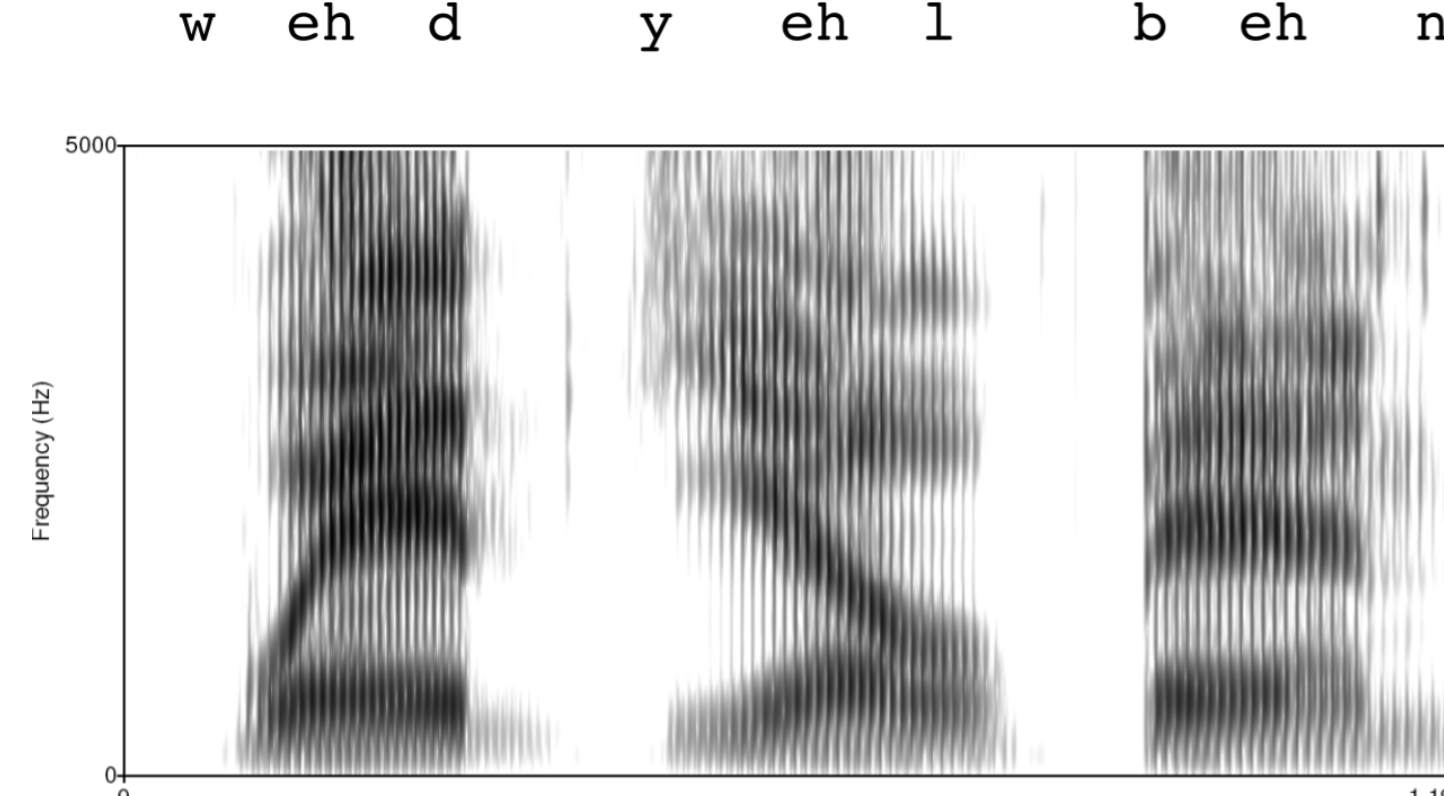

Different variation of "iy" in context
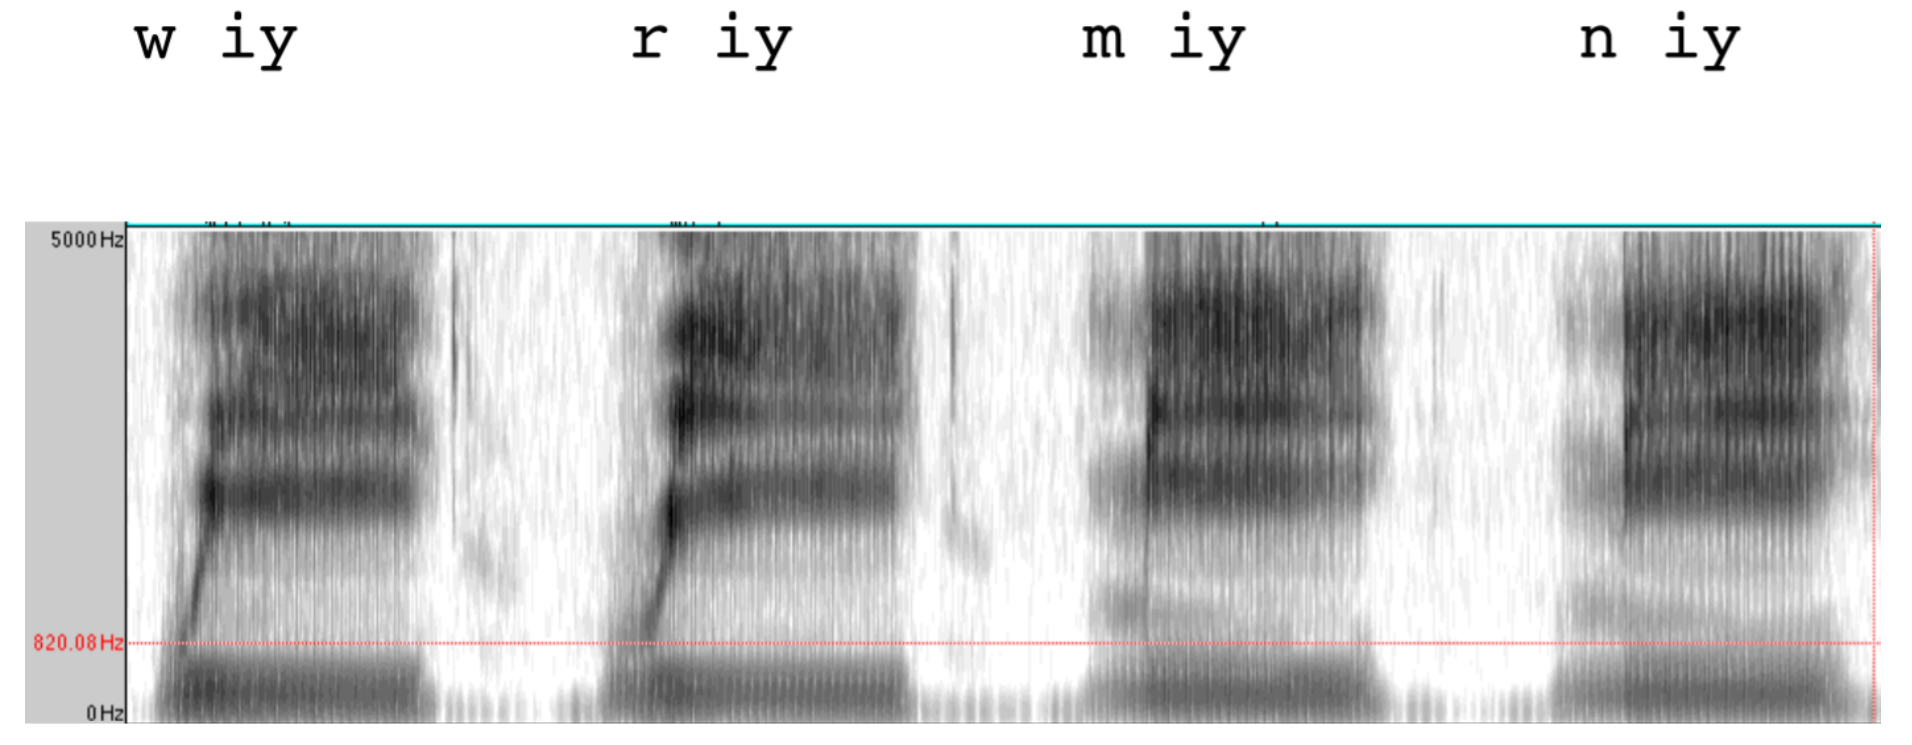

### Let's dig into the pipeline a bit more, what does the model take as an input and output when it processes the audio?

In [11]:
import torch
from datasets import load_dataset
from transformers import WhisperProcessor, WhisperForConditionalGeneration

In [13]:
# load model and tokenizer
processor = WhisperProcessor.from_pretrained("openai/whisper-base")
model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-base")
 
# tokenize
input_features = processor(next(iter(audio_files))["audio"]["array"], return_tensors="pt", sampling_rate=next(iter(audio_files))["audio"]["sampling_rate"]).input_features  # Batch size 1

# generate token ids
predicted_ids = model.generate(input_features)

# decode token ids to text
transcription = processor.batch_decode(predicted_ids, skip_special_tokens=True)
transcription

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (448) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[' When you call someone who is thousands of miles away, you are using a satellite.']

### Um, wait, what the fook?

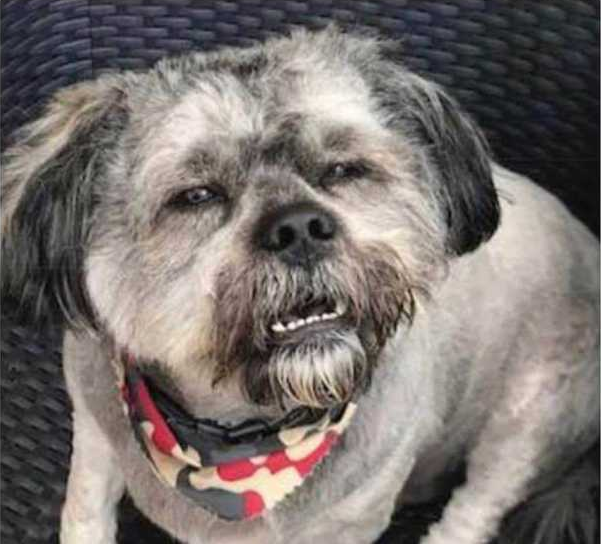

Let's unpack this a bit..

Architecture-wise this is just a simple Encoder-Decoder architecture.

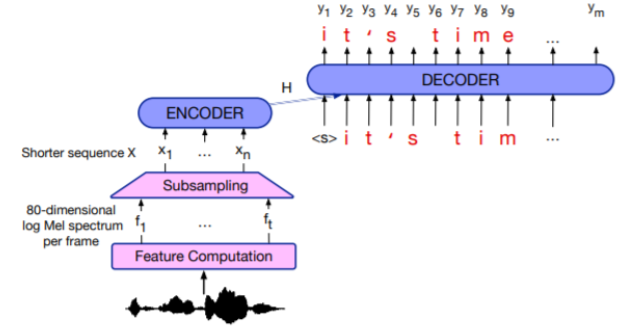

![](https://images.openai.com/blob/d9c13138-366f-49d3-b8bd-cb3f5a973a5b/asr-summary-of-model-architecture-desktop.svg?width=10&height=10&quality=50)

In [14]:
# load model and tokenizer
processor = WhisperProcessor.from_pretrained("openai/whisper-base")
model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-base")

In [15]:
# tokenize
input_features = processor(next(iter(audio_files))["audio"]["array"], return_tensors="pt", sampling_rate=next(iter(audio_files))["audio"]["sampling_rate"]).input_features  # Batch size 1
print(input_features)

tensor([[[-0.5068,  0.0386, -0.2643,  ..., -1.3956, -1.3956, -1.3956],
         [-0.4538, -0.0909, -0.0090,  ..., -1.3956, -1.3956, -1.3956],
         [-0.4799, -0.1993, -0.1104,  ..., -1.3956, -1.3956, -1.3956],
         ...,
         [-1.3956, -1.1315, -1.0398,  ..., -1.3956, -1.3956, -1.3956],
         [-1.3956, -1.1232, -1.0141,  ..., -1.3956, -1.3956, -1.3956],
         [-1.3956, -1.1903, -1.1930,  ..., -1.3956, -1.3956, -1.3956]]])


In [16]:
# What's the input size here?
print(len(input_features[0]))

80


In [17]:
# generate token ids
predicted_ids = model.generate(input_features)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (448) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [18]:
predicted_ids

tensor([[50258, 50259, 50359, 50363,  1133,   291,   818,  1580,   567,   307,
          5383,   295,  6193,  1314,    11,   291,   366,  1228,   257, 16016,
            13, 50257]])

### Yo! But, what are these ids? 
Let's look at them in a bit more detail: https://huggingface.co/openai/whisper-base/raw/main/vocab.json

In [ ]:
# decode token ids to text
transcription = processor.batch_decode(predicted_ids, skip_special_tokens=True)
transcription

164


And that's it, we've successfully managed to infer from Whisper! and understood a little bit behind the scenes! 🤗